In [196]:
## PERFORMANCE OF DEFENCE STOCKS DURING PERIODS OF GEOPOLITICAL TENSION ##
## Akram S. Sadek ##

# Setup Notebook

import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as pdr
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [197]:
# Date definitions

df_start = '1989-11-1'
df_end = '2022-1-30'

# Notable geopolitical events
berlin_wall = '1989-11-9'
kuwait_invasion = '1990-8-2'
iraq_war = '1991-1-16'
afghanistan_invasion = '2001-10-7'
iraq_invasion = '2003-3-20'

russia_ukraine_1_start = '2021-3-3'
russia_ukraine_1_end = '2021-4-22'

russia_china = '2021-10-11'

# Time periods for analysis

# Period A
fall_comm_start = '1989-11-9'
fall_comm_end = '1990-8-1'

# Period B
iraq_1_start = '1990-8-2'
iraq_1_end = '1991-2-28'

# Period C
afghanistan_start = '2001-9-17'
afghanistan_end = '2014-12-28'

# Period D
iraq_2_start = '2002-9-12'
iraq_2_end = '2009-4-30'

#Period E
russia_china_start = '2021-10-11'
russia_china_end = '2022-1-28'

In [198]:
# Main defence stocks

# Lockheed-Martin, Northrup Grumman, Raytheon Technologies, General Dynamics, BAE Systems
LMT = pdr.DataReader('LMT', 'yahoo', start = df_start, end = df_end)
NOC = pdr.DataReader('NOC', 'yahoo', start = df_start, end = df_end)
RTX = pdr.DataReader('RTX', 'yahoo', start = df_start, end = df_end)
GD = pdr.DataReader('GD', 'yahoo', start = df_start, end = df_end)
BA_L = pdr.DataReader('BA.L', 'yahoo', start = df_start, end = df_end)

# Smaller defence stocks

# L3Harris Technologies, Leidos Holdings
LHX = pdr.DataReader('LHX', 'yahoo', start = df_start, end = df_end)
LDOS = pdr.DataReader('LDOS', 'yahoo', start = df_start, end = df_end)

# Dual civilian-defence stocks

# British Aerospace, Honeywell International, Airbus, Rolls-Royce Holdings
BA = pdr.DataReader('BA', 'yahoo', start = df_start, end = df_end)
HON = pdr.DataReader('HON', 'yahoo', start = df_start, end = df_end)
AIR_DE = pdr.DataReader('AIR.DE', 'yahoo', start = df_start, end = df_end)
RRU_DE = pdr.DataReader('RRU.DE', 'yahoo', start = df_start, end = df_end)

In [199]:
# Tech stocks

# Tesla, Xilinx, Broadcom, GlobalFoundries, Intel, Microsoft, IBM
TSLA = pdr.DataReader('TSLA', 'yahoo', start = df_start, end = df_end)
XLNX = pdr.DataReader('XLNX', 'yahoo', start = df_start, end = df_end)
AVGO = pdr.DataReader('AVGO', 'yahoo', start = df_start, end = df_end)
GFS = pdr.DataReader('GFS', 'yahoo', start = df_start, end = df_end)
INTC = pdr.DataReader('INTC', 'yahoo', start = df_start, end = df_end)
MSFT = pdr.DataReader('MSFT', 'yahoo', start = df_start, end = df_end)
IBM = pdr.DataReader('IBM', 'yahoo', start = df_start, end = df_end)


In [200]:
# Dividends for all stocks

LMT_D = pdr.DataReader('LMT', 'yahoo-dividends', start = df_start, end = df_end)
NOC_D = pdr.DataReader('NOC', 'yahoo-dividends', start = df_start, end = df_end)
RTX_D = pdr.DataReader('RTX', 'yahoo-dividends', start = df_start, end = df_end)
GD_D = pdr.DataReader('GD', 'yahoo-dividends', start = df_start, end = df_end)
BA_L_D = pdr.DataReader('BA.L', 'yahoo-dividends', start = df_start, end = df_end)
LHX_D = pdr.DataReader('LHX', 'yahoo-dividends', start = df_start, end = df_end)
LDOS_D = pdr.DataReader('LDOS', 'yahoo-dividends', start = df_start, end = df_end)
BA_D = pdr.DataReader('BA', 'yahoo-dividends', start = df_start, end = df_end)
HON_D = pdr.DataReader('HON', 'yahoo-dividends', start = df_start, end = df_end)
AIR_DE_D = pdr.DataReader('AIR.DE', 'yahoo-dividends', start = df_start, end = df_end)
RRU_DE_D = pdr.DataReader('RRU.DE', 'yahoo-dividends', start = df_start, end = df_end)
TSLA_D = pdr.DataReader('TSLA', 'yahoo-dividends', start = df_start, end = df_end)
XLNX_D = pdr.DataReader('XLNX', 'yahoo-dividends', start = df_start, end = df_end)
AVGO_D = pdr.DataReader('AVGO', 'yahoo-dividends', start = df_start, end = df_end)
GFS_D = pdr.DataReader('GFS', 'yahoo-dividends', start = df_start, end = df_end)
INTC_D = pdr.DataReader('INTC', 'yahoo-dividends', start = df_start, end = df_end)
MSFT_D = pdr.DataReader('MSFT', 'yahoo-dividends', start = df_start, end = df_end)
IBM_D = pdr.DataReader('IBM', 'yahoo-dividends', start = df_start, end = df_end)


In [201]:
# Other financial indicators

# Gold (from 2000)
GC_F = pdr.DataReader('GC=F', 'yahoo', start = df_start, end = df_end)

# US Government 10 Year Bonds
TNX = pdr.DataReader('^TNX', 'yahoo', start = df_start, end = df_end)

# Oil (from 2000)
CL_F = pdr.DataReader('CL=F', 'yahoo', start = df_start, end = df_end)

# S&P500
GSPC = pdr.DataReader('^GSPC', 'yahoo', start = df_start, end = df_end)


In [202]:
GC_F.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0.0,273.899994
2000-08-31,278.299988,274.799988,274.799988,278.299988,0.0,278.299988
2000-09-01,277.000000,277.000000,277.000000,277.000000,0.0,277.000000
2000-09-05,275.799988,275.799988,275.799988,275.799988,2.0,275.799988
2000-09-06,274.200012,274.200012,274.200012,274.200012,0.0,274.200012


In [203]:
LMT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1989-11-01,13.611963,13.420245,13.573620,13.496933,472374.0,5.595064
1989-11-02,13.535276,13.305215,13.535276,13.343558,219398.0,5.531481
1989-11-03,13.381902,13.075153,13.343558,13.075153,422496.0,5.420218
1989-11-06,13.151840,13.036810,13.075153,13.075153,288184.0,5.420218
1989-11-07,13.305215,12.998466,13.113497,13.266871,380442.0,5.499691


In [204]:
LMT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-24,374.540009,365.339996,369.549988,373.329987,3023300.0,373.329987
2022-01-25,388.000000,370.779999,377.850006,387.170013,3182400.0,387.170013
2022-01-26,393.630005,383.700012,388.000000,391.239990,3640500.0,391.239990
2022-01-27,395.600006,384.739990,389.390015,389.079987,2566200.0,389.079987
2022-01-28,393.329987,384.779999,389.100006,393.149994,2145100.0,393.149994


In [205]:
LMT_D.head()

,action,value
2021-11-30,DIVIDEND,2.8
2021-08-31,DIVIDEND,2.6
2021-05-28,DIVIDEND,2.6
2021-02-26,DIVIDEND,2.6
2020-11-30,DIVIDEND,2.6


In [206]:
LMT_D.tail()

,action,value
1990-11-13,DIVIDEND,0.138037
1990-08-14,DIVIDEND,0.138037
1990-05-16,DIVIDEND,0.138037
1990-02-13,DIVIDEND,0.138037
1989-11-14,DIVIDEND,0.138037


In [207]:
# Dividend tables are sorted in descending order. 
# We need to sort them in ascending order. And set index as 'Date'.

LMT_D = LMT_D.reset_index()
NOC_D = NOC_D.reset_index()
RTX_D = RTX_D.reset_index()
GD_D = GD_D.reset_index()
BA_L_D = BA_L_D.reset_index()
LHX_D = LHX_D.reset_index()
LDOS_D = LDOS_D.reset_index()
BA_D = BA_D.reset_index()
HON_D = HON_D.reset_index()
AIR_DE_D = AIR_DE_D.reset_index()
RRU_DE_D = RRU_DE_D.reset_index()
TSLA_D = TSLA_D.reset_index()
XLNX_D = XLNX_D.reset_index()
AVGO_D = AVGO_D.reset_index()
GFS_D = GFS_D.reset_index()
INTC_D = INTC_D.reset_index()
MSFT_D = MSFT_D.reset_index()
IBM_D = IBM_D.reset_index()


In [208]:
LMT_D = LMT_D.rename(columns = {'index': 'Date'})
NOC_D = NOC_D.rename(columns = {'index': 'Date'})
RTX_D = RTX_D.rename(columns = {'index': 'Date'})
GD_D = GD_D.rename(columns = {'index': 'Date'})
BA_L_D = BA_L_D.rename(columns = {'index': 'Date'})
LHX_D = LHX_D.rename(columns = {'index': 'Date'})
LDOS_D = LDOS_D.rename(columns = {'index': 'Date'})
BA_D = BA_D.rename(columns = {'index': 'Date'})
HON_D = HON_D.rename(columns = {'index': 'Date'})
AIR_DE_D = AIR_DE_D.rename(columns = {'index': 'Date'})
RRU_DE_D = RRU_DE_D.rename(columns = {'index': 'Date'})
TSLA_D = TSLA_D.rename(columns = {'index': 'Date'})
XLNX_D = XLNX_D.rename(columns = {'index': 'Date'})
AVGO_D = AVGO_D.rename(columns = {'index': 'Date'})
GFS_D = GFS_D.rename(columns = {'index': 'Date'})
INTC_D = INTC_D.rename(columns = {'index': 'Date'})
MSFT_D = MSFT_D.rename(columns = {'index': 'Date'})
IBM_D = IBM_D.rename(columns = {'index': 'Date'})

In [209]:
LMT_D = LMT_D.set_index('Date')
NOC_D = NOC_D.set_index('Date')
RTX_D = RTX_D.set_index('Date')
GD_D = GD_D.set_index('Date')
BA_L_D = BA_L_D.set_index('Date')
LHX_D = LHX_D.set_index('Date')
LDOS_D = LDOS_D.set_index('Date')
BA_D = BA_D.set_index('Date')
HON_D = HON_D.set_index('Date')
AIR_DE_D = AIR_DE_D.set_index('Date')
RRU_DE_D = RRU_DE_D.set_index('Date')
TSLA_D = TSLA_D.set_index('Date')
XLNX_D = XLNX_D.set_index('Date')
AVGO_D = AVGO_D.set_index('Date')
GFS_D = GFS_D.set_index('Date')
INTC_D = INTC_D.set_index('Date')
MSFT_D = MSFT_D.set_index('Date')
IBM_D = IBM_D.set_index('Date')

In [210]:
LMT_D = LMT_D.sort_values(by = "Date")
NOC_D = NOC_D.sort_values(by = "Date")
RTX_D = RTX_D.sort_values(by = "Date")
GD_D = GD_D.sort_values(by = "Date")
BA_L_D = BA_L_D.sort_values(by = "Date")
LHX_D = LHX_D.sort_values(by = "Date")
LDOS_D = LDOS_D.sort_values(by = "Date")
BA_D = BA_D.sort_values(by = "Date")
HON_D = HON_D.sort_values(by = "Date")
AIR_DE_D = AIR_DE_D.sort_values(by = "Date")
RRU_DE_D = RRU_DE_D.sort_values(by = "Date")
TSLA_D = TSLA_D.sort_values(by = "Date")
XLNX_D = XLNX_D.sort_values(by = "Date")
AVGO_D = AVGO_D.sort_values(by = "Date")
GFS_D = GFS_D.sort_values(by = "Date")
INTC_D = INTC_D.sort_values(by = "Date")
MSFT_D = MSFT_D.sort_values(by = "Date")
IBM_D = IBM_D.sort_values(by = "Date")

In [211]:
LMT_D.head()

,action,value
Date,,
1989-11-14,DIVIDEND,0.138037
1990-02-13,DIVIDEND,0.138037
1990-05-16,DIVIDEND,0.138037
1990-08-14,DIVIDEND,0.138037
1990-11-13,DIVIDEND,0.138037


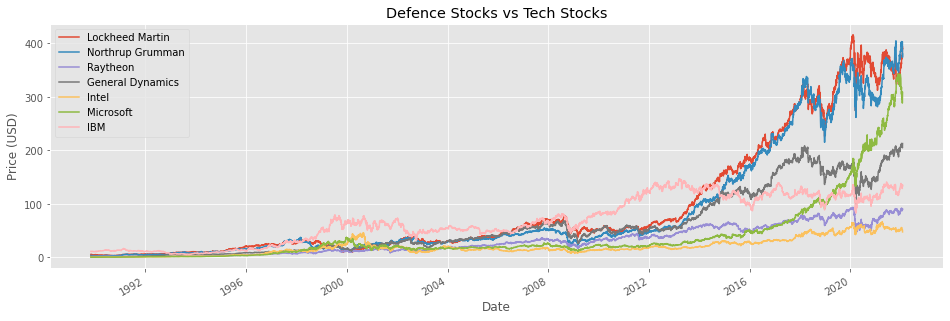

In [212]:
LMT['Adj Close'].plot(label='Lockheed Martin', figsize=(16,5))
NOC['Adj Close'].plot(label='Northrup Grumman')
RTX['Adj Close'].plot(label='Raytheon')
GD['Adj Close'].plot(label='General Dynamics')
INTC['Adj Close'].plot(label='Intel')
MSFT['Adj Close'].plot(label='Microsoft')
IBM['Adj Close'].plot(label='IBM')
plt.legend()
plt.title('Defence Stocks vs Tech Stocks')
plt.ylabel('Price (USD)')
plt.show;

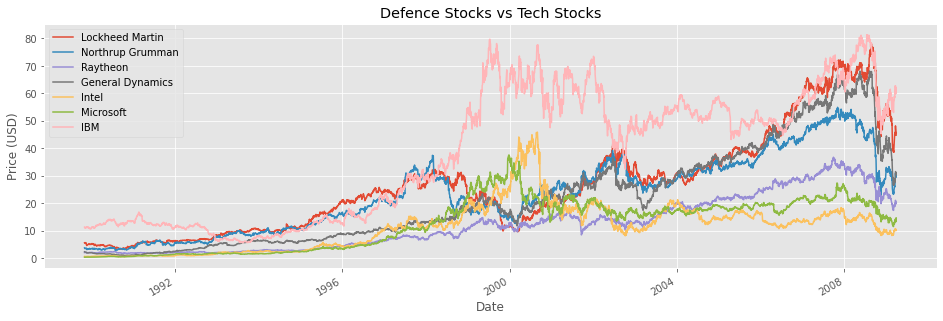

In [265]:
# Let's try and zoom into the earlier data to see the trend more clearly

LMT['Adj Close'].loc['1989-01-01':'2009-04-01'].plot(label='Lockheed Martin', figsize=(16,5))
NOC['Adj Close'].loc['1989-01-01':'2009-04-01'].plot(label='Northrup Grumman')
RTX['Adj Close'].loc['1989-01-01':'2009-04-01'].plot(label='Raytheon')
GD['Adj Close'].loc['1989-01-01':'2009-04-01'].plot(label='General Dynamics')
INTC['Adj Close'].loc['1989-01-01':'2009-04-01'].plot(label='Intel')
MSFT['Adj Close'].loc['1989-01-01':'2009-04-01'].plot(label='Microsoft')
IBM['Adj Close'].loc['1989-01-01':'2009-04-01'].plot(label='IBM')
plt.legend()
plt.title('Defence Stocks vs Tech Stocks')
plt.ylabel('Price (USD)')
plt.show;


In [213]:
# Concatenation of stock data in one DataFrame

stock_data = pd.concat([LMT['Adj Close'], NOC['Adj Close'], RTX['Adj Close'], GD['Adj Close'], \
                       BA_L['Adj Close'], LHX['Adj Close'], LDOS['Adj Close'], BA['Adj Close'], \
                       HON['Adj Close'], AIR_DE['Adj Close'], RRU_DE['Adj Close'], TSLA['Adj Close'], \
                       XLNX['Adj Close'], AVGO['Adj Close'], GFS['Adj Close'], INTC['Adj Close'], \
                       MSFT['Adj Close'], IBM['Adj Close'], GC_F['Adj Close'], TNX['Adj Close'], \
                       CL_F['Adj Close'], GSPC['Adj Close']], axis=1)
  

In [214]:
stock_data.columns = ['LMT', 'NOC', 'RTX', 'GD', 'BA_L', 'LHX', 'LDOS', 'BA', 'HON', 'AIR_DE', \
                      'RRU_DE', 'TSLA', 'XLNX', 'AVGO', 'GFS', 'INTC', 'MSFT', 'IBM', 'Gold', \
                      'Bonds', 'Oil', 'S&P500']

In [215]:
# Make sure date index is a datetime series

stock_data = stock_data.reset_index()
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

In [216]:
stock_data.head()

,LMT,NOC,RTX,GD,BA_L,LHX,LDOS,BA,HON,AIR_DE,RRU_DE,TSLA,XLNX,AVGO,GFS,INTC,MSFT,IBM,Gold,Bonds,Oil,S&P500
Date,,,,,,,,,,,,,,,,,,,,,,
1989-11-01,5.595064,3.736065,2.046658,2.309852,46.585594,3.809033,NaN,10.024442,4.116001,NaN,NaN,NaN,NaN,NaN,NaN,0.624656,0.360051,11.256064,NaN,7.91,NaN,341.200012
1989-11-02,5.531481,3.688169,2.046658,2.277164,45.393307,3.732080,NaN,10.069091,4.116001,NaN,NaN,NaN,NaN,NaN,NaN,0.591779,0.334294,11.151813,NaN,7.87,NaN,338.480011
1989-11-03,5.420218,3.616320,2.041864,2.298956,46.074619,3.719255,NaN,10.136074,4.144485,NaN,NaN,NaN,NaN,NaN,NaN,0.575341,0.343062,11.223024,NaN,7.96,NaN,337.619995
1989-11-06,5.420218,3.448676,2.003520,2.271716,45.478439,3.578181,NaN,9.734204,4.116001,NaN,NaN,NaN,NaN,NaN,NaN,0.558903,0.338678,11.009385,NaN,8.00,NaN,332.609985
1989-11-07,5.499691,3.520523,2.013104,2.277164,46.074619,3.539706,NaN,9.577921,4.087517,NaN,NaN,NaN,NaN,NaN,NaN,0.591779,0.355118,11.094840,NaN,7.90,NaN,334.809998


In [217]:
# We want to make five different versions of the DataFrame corresponding to different geopolitical events

stock_data_A = stock_data.loc[fall_comm_start:fall_comm_end]
stock_data_B = stock_data.loc[iraq_1_start:iraq_1_end]
stock_data_C = stock_data.loc[afghanistan_start:afghanistan_end]
stock_data_D = stock_data.loc[iraq_2_start:iraq_2_end]
stock_data_E = stock_data.loc[russia_china_start:russia_china_end]

In [218]:
# Setting globally not to limit showing columns during head/tail
pd.options.display.max_columns = None

stock_data_A.head()

,LMT,NOC,RTX,GD,BA_L,LHX,LDOS,BA,HON,AIR_DE,RRU_DE,TSLA,XLNX,AVGO,GFS,INTC,MSFT,IBM,Gold,Bonds,Oil,S&P500
Date,,,,,,,,,,,,,,,,,,,,,,
1989-11-09,5.626857,3.592372,2.041864,2.277164,46.755920,3.591006,NaN,9.890484,4.158727,NaN,NaN,NaN,NaN,NaN,NaN,0.605869,0.367175,11.094840,NaN,7.90,NaN,336.570007
1989-11-10,5.658643,3.592372,2.085002,2.266269,45.563625,3.642308,NaN,10.002121,4.172971,NaN,NaN,NaN,NaN,NaN,NaN,0.617611,0.370463,11.180291,NaN,7.92,NaN,339.100006
1989-11-13,5.626857,3.592372,2.089796,2.239030,44.711964,3.693605,NaN,10.033538,4.196041,NaN,NaN,NaN,NaN,NaN,NaN,0.622307,0.386356,11.194535,NaN,7.89,NaN,339.549988
1989-11-14,5.379551,3.544474,2.061037,2.222687,44.797138,3.667955,NaN,9.943756,4.095106,NaN,NaN,NaN,NaN,NaN,NaN,0.619959,0.379231,11.166060,NaN,7.87,NaN,337.989990
1989-11-15,5.299261,3.568423,2.089796,2.206344,44.200974,3.705659,NaN,10.078433,4.095106,NaN,NaN,NaN,NaN,NaN,NaN,0.634049,0.388000,11.151813,NaN,7.82,NaN,340.540009


In [219]:
# We need to delete columns of companies that didn't exist in the time period, or for which data is unavailable

stock_data_A = stock_data_A.drop(columns=['LDOS','AIR_DE','RRU_DE','TSLA','XLNX','AVGO','GFS','Gold','Oil'])

In [220]:
stock_data_A.head()

,LMT,NOC,RTX,GD,BA_L,LHX,BA,HON,INTC,MSFT,IBM,Bonds,S&P500
Date,,,,,,,,,,,,,
1989-11-09,5.626857,3.592372,2.041864,2.277164,46.755920,3.591006,9.890484,4.158727,0.605869,0.367175,11.094840,7.90,336.570007
1989-11-10,5.658643,3.592372,2.085002,2.266269,45.563625,3.642308,10.002121,4.172971,0.617611,0.370463,11.180291,7.92,339.100006
1989-11-13,5.626857,3.592372,2.089796,2.239030,44.711964,3.693605,10.033538,4.196041,0.622307,0.386356,11.194535,7.89,339.549988
1989-11-14,5.379551,3.544474,2.061037,2.222687,44.797138,3.667955,9.943756,4.095106,0.619959,0.379231,11.166060,7.87,337.989990
1989-11-15,5.299261,3.568423,2.089796,2.206344,44.200974,3.705659,10.078433,4.095106,0.634049,0.388000,11.151813,7.82,340.540009


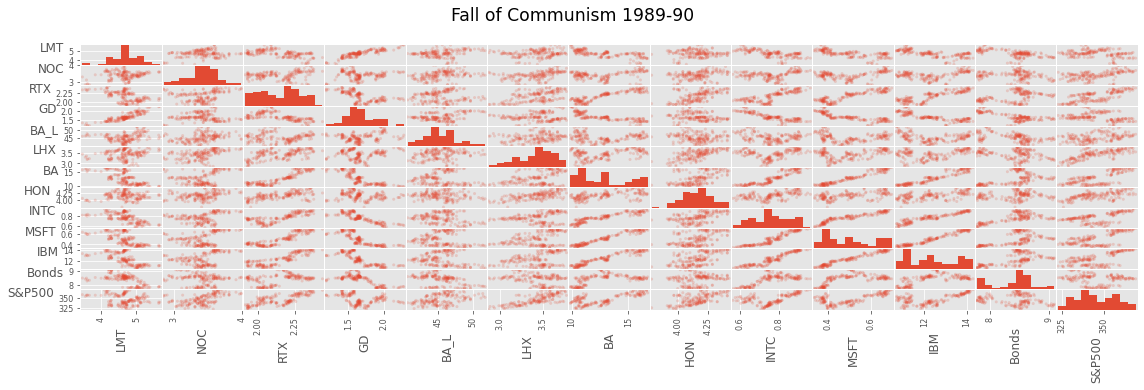

In [221]:
axes_A = pd.plotting.scatter_matrix(stock_data_A, alpha=0.2, figsize=(16,5))

for ax in axes_A.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Fall of Communism 1989-90', y=1.075, size='xx-large')
plt.show();

In [222]:
stock_data_B.head()

,LMT,NOC,RTX,GD,BA_L,LHX,LDOS,BA,HON,AIR_DE,RRU_DE,TSLA,XLNX,AVGO,GFS,INTC,MSFT,IBM,Gold,Bonds,Oil,S&P500
Date,,,,,,,,,,,,,,,,,,,,,,
1990-08-02,3.691762,2.952245,2.233928,1.255884,48.033432,3.120067,NaN,14.550177,3.903887,NaN,NaN,NaN,0.809166,NaN,NaN,0.756162,0.578712,12.802355,NaN,8.41,NaN,351.480011
1990-08-03,3.741207,3.053179,2.204470,1.289226,49.310909,2.936532,NaN,14.686166,3.948246,NaN,NaN,NaN,0.785260,NaN,NaN,0.737376,0.554598,12.612798,NaN,8.43,NaN,344.859985
1990-08-06,3.741207,3.103643,2.145552,1.333682,47.692768,2.831656,NaN,13.734277,3.741225,NaN,NaN,NaN,0.735606,NaN,NaN,0.699802,0.530486,12.254165,NaN,8.71,NaN,334.429993
1990-08-07,3.790650,3.103643,2.037538,1.322568,46.841103,2.897204,NaN,14.142236,3.726438,NaN,NaN,NaN,0.779743,NaN,NaN,0.711544,0.537061,12.150943,NaN,8.78,NaN,334.829987
1990-08-08,3.988422,3.078412,2.086636,1.272555,46.330116,2.831656,NaN,14.414203,3.859526,NaN,NaN,NaN,0.838591,NaN,NaN,0.697453,0.556790,12.165696,NaN,8.77,NaN,338.350006


In [223]:
stock_data_B = stock_data_B.drop(columns=['LDOS','AIR_DE','RRU_DE','TSLA','XLNX','AVGO','GFS','Gold','Oil'])

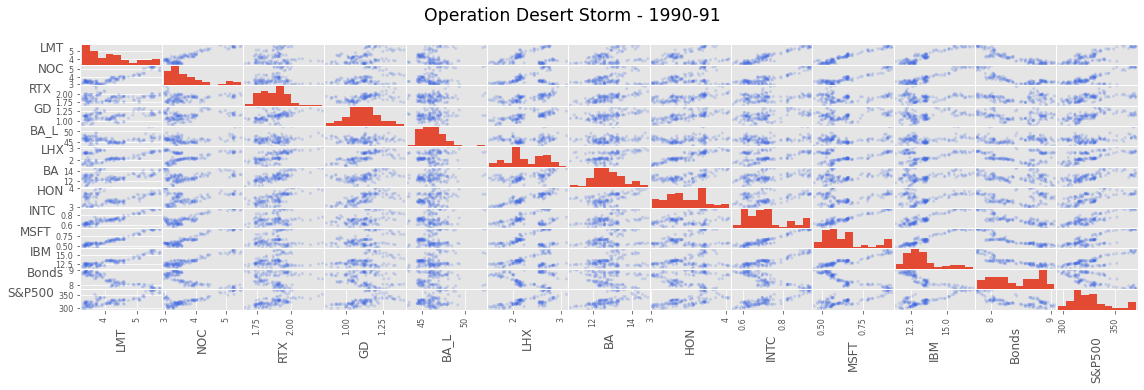

In [224]:
axes_B = pd.plotting.scatter_matrix(stock_data_B, alpha=0.2, figsize=(16,5), color='royalblue')

for ax in axes_B.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Operation Desert Storm - 1990-91', y=1.075, size='xx-large')
plt.show();

In [225]:
stock_data_C.head()

,LMT,NOC,RTX,GD,BA_L,LHX,LDOS,BA,HON,AIR_DE,RRU_DE,TSLA,XLNX,AVGO,GFS,INTC,MSFT,IBM,Gold,Bonds,Oil,S&P500
Date,,,,,,,,,,,,,,,,,,,,,,
2001-09-17,25.981409,27.764992,9.957649,27.040472,145.826675,9.833686,NaN,23.593903,17.617027,7.847481,NaN,NaN,22.830860,NaN,NaN,14.493461,16.701618,54.551769,289.799988,4.611,28.809999,1038.770020
2001-09-18,26.365658,27.750353,9.992266,26.893686,143.904144,9.468009,NaN,21.840849,17.025822,6.568634,NaN,NaN,21.178398,NaN,NaN,14.419732,17.146696,56.340157,288.100006,4.705,27.700001,1032.739990
2001-09-19,25.372520,28.409342,9.703107,27.004578,130.078247,9.540492,NaN,21.491545,15.873237,6.103598,NaN,NaN,20.585203,NaN,NaN,13.688603,17.004646,56.106358,291.500000,4.681,26.719999,1016.099976
2001-09-20,25.100580,29.847382,8.479272,25.885782,124.760559,9.817216,NaN,19.613260,14.087651,6.062906,NaN,NaN,19.469435,NaN,NaN,12.699428,16.022940,54.586826,289.000000,4.728,26.590000,984.539978
2001-09-21,24.946875,29.097599,8.603489,27.405777,122.715286,9.586609,NaN,19.837336,14.810251,5.667625,NaN,NaN,17.365013,NaN,NaN,11.857721,15.691506,52.891918,291.899994,4.689,25.969999,965.799988


In [226]:
stock_data_C = stock_data_C.drop(columns=['LDOS','RRU_DE','TSLA','AVGO','GFS','IBM','XLNX'])

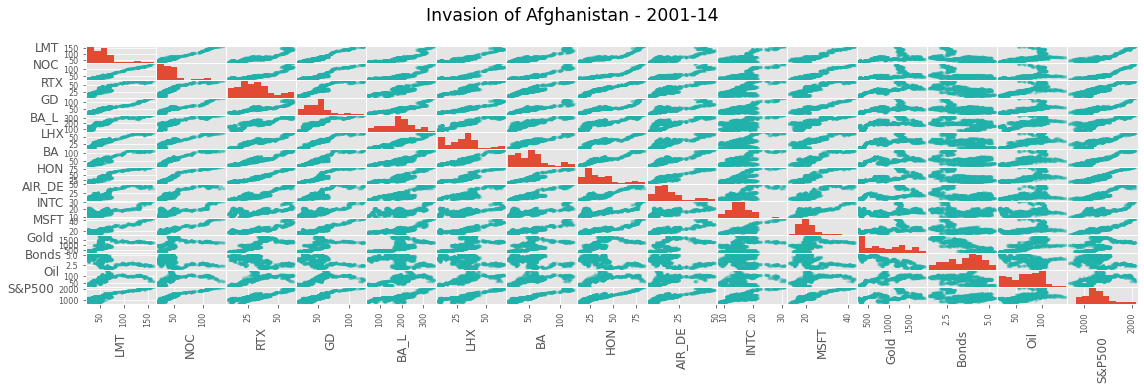

In [227]:
axes_C = pd.plotting.scatter_matrix(stock_data_C, alpha=0.2, figsize=(16,5), color='lightseagreen')

for ax in axes_C.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Invasion of Afghanistan - 2001-14', y=1.075, size='xx-large')
plt.show();

In [228]:
stock_data_D.head()

,LMT,NOC,RTX,GD,BA_L,LHX,LDOS,BA,HON,AIR_DE,RRU_DE,TSLA,XLNX,AVGO,GFS,INTC,MSFT,IBM,Gold,Bonds,Oil,S&P500
Date,,,,,,,,,,,,,,,,,,,,,,
2002-09-12,39.313347,37.680408,12.629162,27.427504,97.422089,10.800599,NaN,24.447783,17.306345,7.893118,NaN,NaN,13.000812,NaN,NaN,9.677464,14.883404,42.287243,318.899994,3.967,28.850000,886.909973
2002-09-13,39.164406,37.442688,11.988400,27.430805,99.521683,10.863626,NaN,23.864260,14.387351,7.789102,NaN,NaN,12.781891,NaN,NaN,9.880874,15.123308,42.657925,316.600006,3.900,29.809999,889.809998
2002-09-16,39.176327,38.037014,12.360453,28.613678,98.597839,10.860307,NaN,24.970951,15.052977,7.831932,NaN,NaN,12.111017,NaN,NaN,9.677464,15.082273,42.552021,317.100006,3.874,29.670000,891.099976
2002-09-17,38.145515,36.699787,12.019405,27.325066,91.543159,10.730942,NaN,24.340469,14.985805,7.464811,NaN,NaN,12.160451,NaN,NaN,9.597332,14.927600,42.216637,317.000000,3.863,29.080000,873.520020
2002-09-18,38.842655,37.077183,11.905717,27.724869,84.404457,10.641377,NaN,24.662415,14.656046,6.944721,NaN,NaN,11.397776,NaN,NaN,9.418577,15.072805,40.922188,320.600006,3.849,29.480000,869.460022


In [229]:
stock_data_D = stock_data_D.drop(columns=['LDOS','RRU_DE','TSLA','AVGO','GFS','IBM','XLNX'])

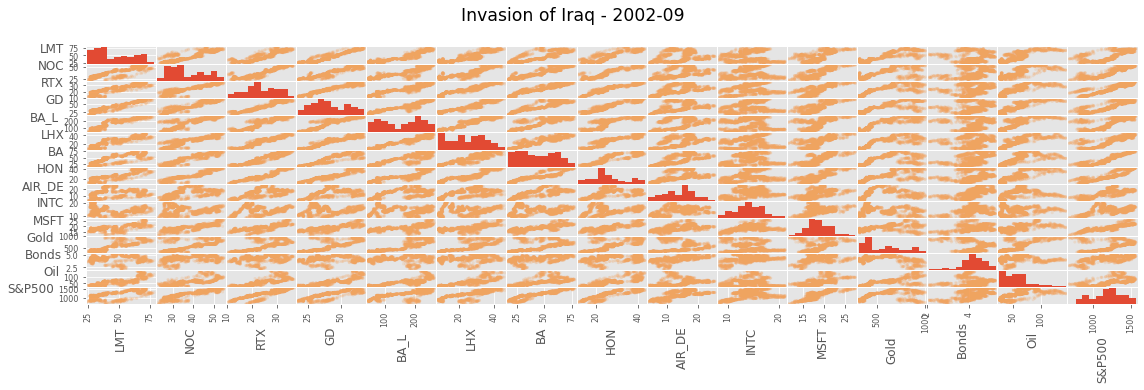

In [230]:
axes_D = pd.plotting.scatter_matrix(stock_data_D, alpha=0.2, figsize=(16,5), color='sandybrown')

for ax in axes_D.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Invasion of Iraq - 2002-09', y=1.075, size='xx-large')
plt.show();

In [231]:
stock_data_E.head()

,LMT,NOC,RTX,GD,BA_L,LHX,LDOS,BA,HON,AIR_DE,RRU_DE,TSLA,XLNX,AVGO,GFS,INTC,MSFT,IBM,Gold,Bonds,Oil,S&P500
Date,,,,,,,,,,,,,,,,,,,,,,
2021-10-11,354.149933,391.451874,89.365768,201.740829,576.069397,234.284607,97.297714,226.449997,214.363602,113.900002,1.7100,791.940002,154.910187,489.210541,NaN,53.070934,293.692688,134.373245,1754.599976,1.614,80.519997,4361.189941
2021-10-12,355.181396,388.375305,89.196762,202.407059,581.576416,236.026535,97.865425,223.570007,213.407745,113.120003,1.7050,805.719971,155.618866,482.195404,NaN,51.809704,292.345154,132.524109,1758.300049,1.580,80.639999,4350.649902
2021-10-13,358.791565,387.011261,89.156998,202.247955,582.756470,233.498245,97.825584,221.779999,214.652359,111.959999,1.6850,811.080017,161.348129,481.927155,NaN,51.899082,295.768890,132.797714,1793.699951,1.549,80.440002,4363.799805
2021-10-14,359.098999,388.245880,88.649971,203.988129,587.083374,235.578613,99.080528,217.440002,217.649414,113.260002,1.7074,818.320007,165.500366,494.437103,NaN,53.527760,302.197113,135.278946,1796.699951,1.519,81.309998,4438.259766
2021-10-15,362.619873,393.642303,90.389763,206.891724,589.443542,237.967545,99.887276,217.039993,219.770248,114.900002,1.7250,843.030029,166.837860,500.051178,NaN,54.083889,303.654449,136.429932,1767.199951,1.576,82.279999,4471.370117


In [232]:
stock_data_E = stock_data_E.drop(columns=['LDOS','AIR_DE','RRU_DE','GFS','IBM','HON','LHX'])

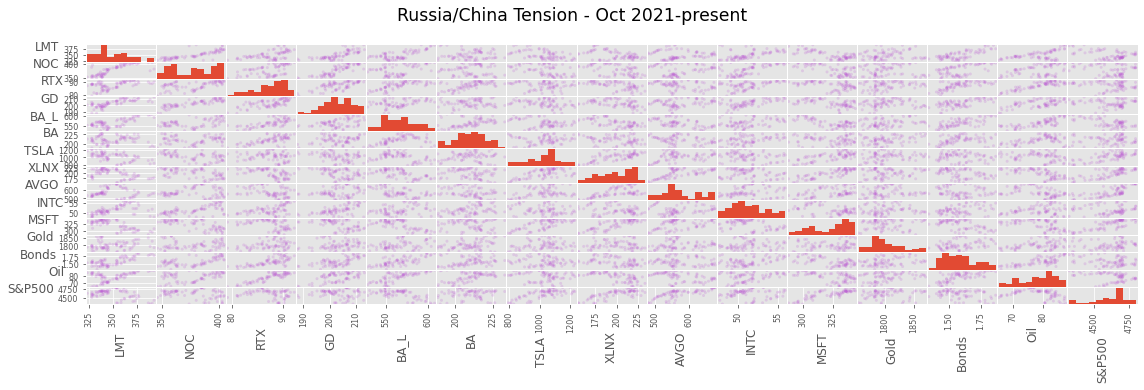

In [233]:
axes_E = pd.plotting.scatter_matrix(stock_data_E, alpha=0.2, figsize=(16,5), color='mediumorchid')

for ax in axes_E.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Russia/China Tension - Oct 2021-present', y=1.075, size='xx-large')
plt.show();

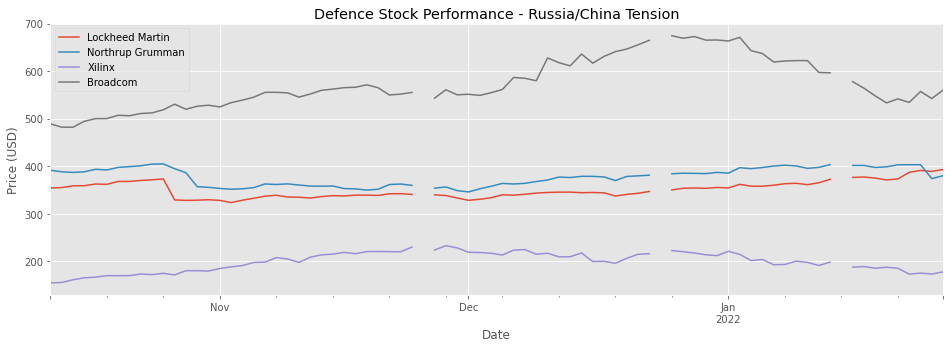

In [234]:
# Plot of defence stocks vs tech stocks in the last few months

stock_data_E['LMT'].plot(label='Lockheed Martin', figsize=(16,5))
stock_data_E['NOC'].plot(label='Northrup Grumman')
#stock_data_E['RTX'].plot(label='Raytheon')
#stock_data_E['GD'].plot(label='General Dynamics')
#stock_data_E['INTC'].plot(label='Intel')
#stock_data_E['MSFT'].plot(label='Microsoft')
#stock_data_E['TSLA'].plot(label='Tesla')
stock_data_E['XLNX'].plot(label='Xilinx')
stock_data_E['AVGO'].plot(label='Broadcom')
#stock_data_E['Oil'].plot(label='Oil')
plt.legend()
plt.title('Defence Stock Performance - Russia/China Tension')
plt.ylabel('Price (USD)')
plt.show;

In [235]:
# Setting up correlation analysis using the rate of return to construct a heat map
# Might be better than a straightforward scatter matrix

stock_return_A = stock_data_A.pct_change()
stock_corr_A = stock_return_A.corr()

stock_return_B = stock_data_B.pct_change()
stock_corr_B = stock_return_B.corr()

stock_return_C = stock_data_C.pct_change()
stock_corr_C = stock_return_C.corr()

stock_return_D = stock_data_D.pct_change()
stock_corr_D = stock_return_D.corr()

stock_return_E = stock_data_E.pct_change()
stock_corr_E = stock_return_E.corr()


In [236]:
stock_corr_A.head()

,LMT,NOC,RTX,GD,BA_L,LHX,BA,HON,INTC,MSFT,IBM,Bonds,S&P500
LMT,1.000000,0.182408,0.385333,0.403471,0.119707,0.272821,0.091631,0.263625,0.270100,0.142013,0.252741,-0.109236,0.398764
NOC,0.182408,1.000000,0.217283,0.442447,0.077424,0.185101,0.182564,0.223939,0.140955,0.088077,0.205072,-0.023816,0.341155
RTX,0.385333,0.217283,1.000000,0.349612,0.232195,0.447897,0.331695,0.293796,0.305136,0.137900,0.323860,-0.200056,0.553991
GD,0.403471,0.442447,0.349612,1.000000,0.141321,0.255441,0.168611,0.237833,0.142420,0.084154,0.232666,0.038304,0.377138
BA_L,0.119707,0.077424,0.232195,0.141321,1.000000,0.024462,0.062919,0.130688,-0.043291,-0.115565,-0.030559,-0.214771,0.101611


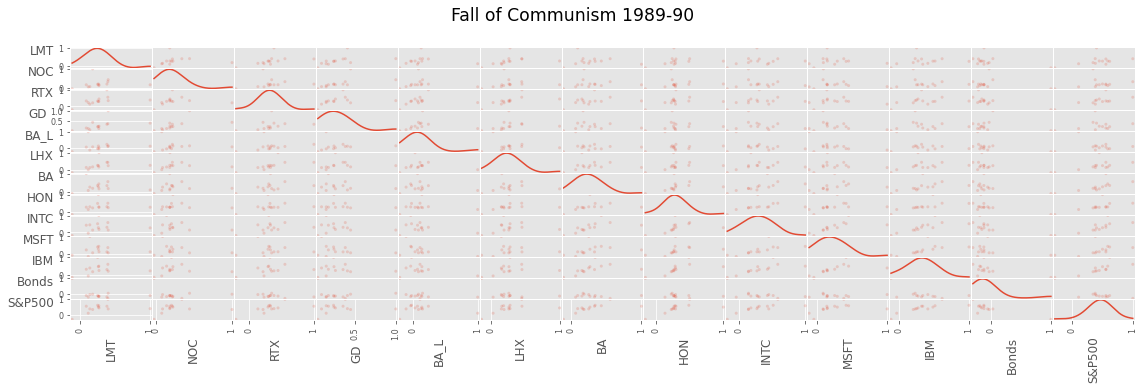

In [238]:
caxes_A = pd.plotting.scatter_matrix(stock_corr_A, diagonal = 'kde', alpha=0.2, figsize=(16,5))

for cax in caxes_A.flatten():
    cax.xaxis.label.set_rotation(90)
    cax.yaxis.label.set_rotation(0)
    cax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Fall of Communism 1989-90', y=1.075, size='xx-large')
plt.show();

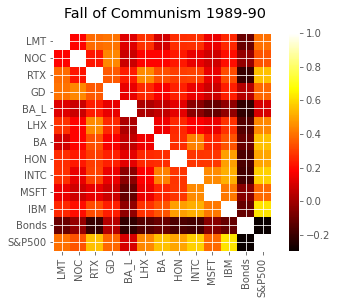

In [263]:
plt.imshow(stock_corr_A, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_A)), stock_corr_A.columns, rotation = 90);
plt.yticks(range(len(stock_corr_A)), stock_corr_A.columns);
plt.suptitle('Fall of Communism 1989-90', y=0.97, size='x-large');

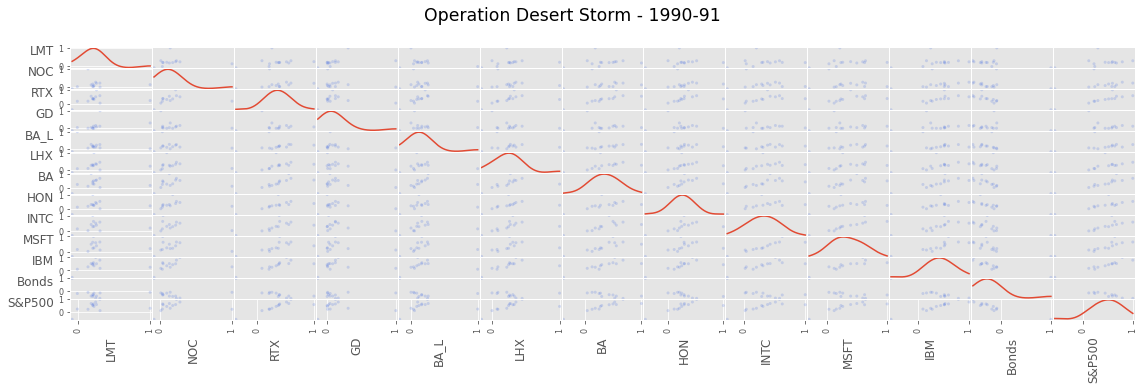

In [242]:
caxes_B = pd.plotting.scatter_matrix(stock_corr_B, diagonal = 'kde', alpha=0.2, figsize=(16,5), color = 'royalblue')

for cax in caxes_B.flatten():
    cax.xaxis.label.set_rotation(90)
    cax.yaxis.label.set_rotation(0)
    cax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Operation Desert Storm - 1990-91', y=1.075, size='xx-large')
plt.show();

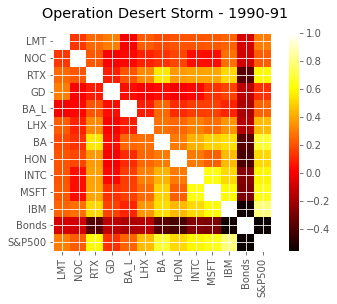

In [262]:
plt.imshow(stock_corr_B, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_B)), stock_corr_B.columns, rotation = 90);
plt.yticks(range(len(stock_corr_B)), stock_corr_B.columns);
plt.suptitle('Operation Desert Storm - 1990-91', y=0.97, size='x-large');

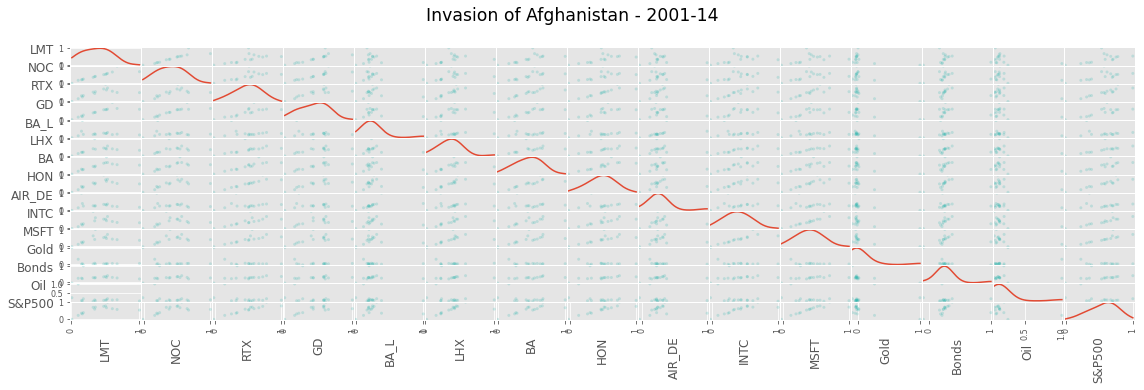

In [246]:
caxes_C = pd.plotting.scatter_matrix(stock_corr_C, diagonal = 'kde', alpha=0.2, figsize=(16,5), color = 'lightseagreen')

for cax in caxes_C.flatten():
    cax.xaxis.label.set_rotation(90)
    cax.yaxis.label.set_rotation(0)
    cax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Invasion of Afghanistan - 2001-14', y=1.075, size='xx-large')
plt.show();

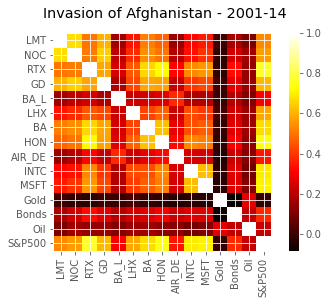

In [261]:
plt.imshow(stock_corr_C, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_C)), stock_corr_C.columns, rotation = 90);
plt.yticks(range(len(stock_corr_C)), stock_corr_C.columns);
plt.suptitle('Invasion of Afghanistan - 2001-14', y=0.97, size='x-large');

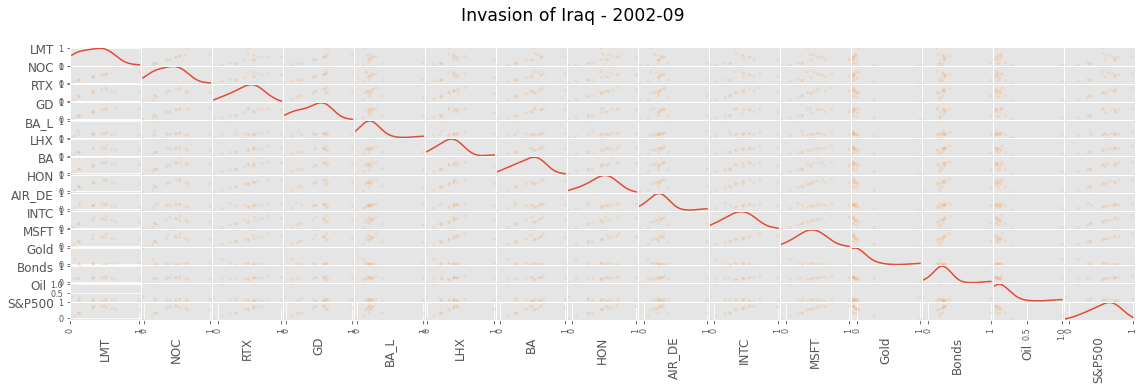

In [248]:
caxes_D = pd.plotting.scatter_matrix(stock_corr_D, diagonal = 'kde', alpha=0.2, figsize=(16,5), color = 'sandybrown')

for cax in caxes_D.flatten():
    cax.xaxis.label.set_rotation(90)
    cax.yaxis.label.set_rotation(0)
    cax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Invasion of Iraq - 2002-09', y=1.075, size='xx-large')
plt.show();

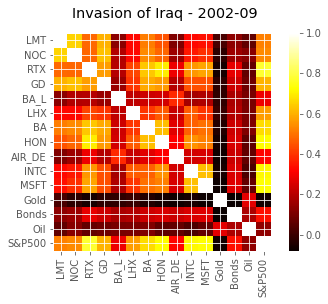

In [260]:
plt.imshow(stock_corr_D, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_D)), stock_corr_D.columns, rotation = 90);
plt.yticks(range(len(stock_corr_D)), stock_corr_D.columns);
plt.suptitle('Invasion of Iraq - 2002-09', y=0.97, size='x-large');

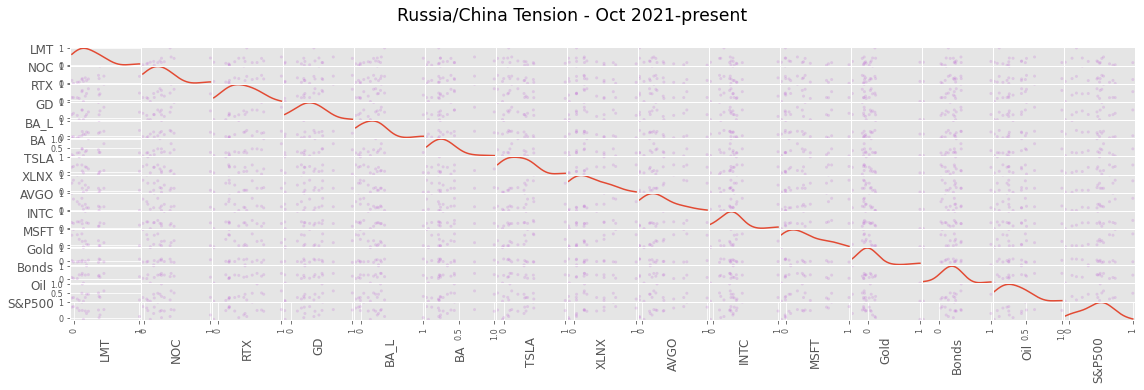

In [250]:
caxes_E = pd.plotting.scatter_matrix(stock_corr_E, diagonal = 'kde', alpha=0.2, figsize=(16,5), color = 'mediumorchid')

for cax in caxes_E.flatten():
    cax.xaxis.label.set_rotation(90)
    cax.yaxis.label.set_rotation(0)
    cax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Russia/China Tension - Oct 2021-present', y=1.075, size='xx-large')
plt.show();

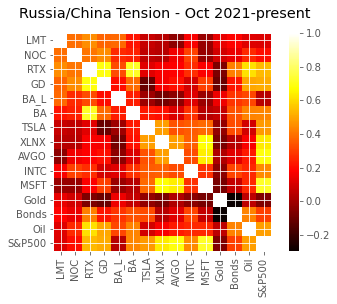

In [259]:
plt.imshow(stock_corr_E, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_E)), stock_corr_E.columns, rotation = 90);
plt.yticks(range(len(stock_corr_E)), stock_corr_E.columns);
plt.suptitle('Russia/China Tension - Oct 2021-present', y=0.97, size='x-large');

In [266]:
# Calculating the returns of each of the stocks so we can directly visualise their volatility

LMT['Returns'] = (LMT['Adj Close']/(LMT['Adj Close'].shift(1))) - 1
NOC['Returns'] = (NOC['Adj Close']/(NOC['Adj Close'].shift(1))) - 1
RTX['Returns'] = (RTX['Adj Close']/(RTX['Adj Close'].shift(1))) - 1
GD['Returns'] = (GD['Adj Close']/(GD['Adj Close'].shift(1))) - 1
BA_L['Returns'] = (BA_L['Adj Close']/(BA_L['Adj Close'].shift(1))) - 1
LHX['Returns'] = (LHX['Adj Close']/(LHX['Adj Close'].shift(1))) - 1
LDOS['Returns'] = (LDOS['Adj Close']/(LDOS['Adj Close'].shift(1))) - 1
BA['Returns'] = (BA['Adj Close']/(BA['Adj Close'].shift(1))) - 1
HON['Returns'] = (HON['Adj Close']/(HON['Adj Close'].shift(1))) - 1
AIR_DE['Returns'] = (AIR_DE['Adj Close']/(AIR_DE['Adj Close'].shift(1))) - 1
RRU_DE['Returns'] = (RRU_DE['Adj Close']/(RRU_DE['Adj Close'].shift(1))) - 1
TSLA['Returns'] = (TSLA['Adj Close']/(TSLA['Adj Close'].shift(1))) - 1
XLNX['Returns'] = (XLNX['Adj Close']/(XLNX['Adj Close'].shift(1))) - 1
AVGO['Returns'] = (AVGO['Adj Close']/(AVGO['Adj Close'].shift(1))) - 1
GFS['Returns'] = (GFS['Adj Close']/(GFS['Adj Close'].shift(1))) - 1
INTC['Returns'] = (INTC['Adj Close']/(INTC['Adj Close'].shift(1))) - 1
MSFT['Returns'] = (MSFT['Adj Close']/(MSFT['Adj Close'].shift(1))) - 1
IBM['Returns'] = (IBM['Adj Close']/(IBM['Adj Close'].shift(1))) - 1
GC_F['Returns'] = (GC_F['Adj Close']/(GC_F['Adj Close'].shift(1))) - 1
CL_F['Returns'] = (CL_F['Adj Close']/(CL_F['Adj Close'].shift(1))) - 1
GSPC['Returns'] = (GSPC['Adj Close']/(GSPC['Adj Close'].shift(1))) - 1

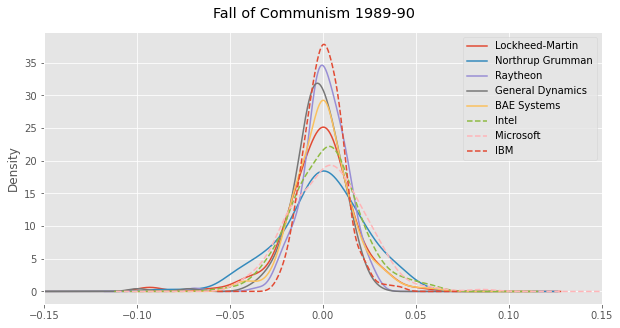

In [294]:
# Plot KDE for Period A

LMT['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='Lockheed-Martin', figsize=(10,5))
NOC['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='Northrup Grumman')
RTX['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='Raytheon')
GD['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='General Dynamics')
BA_L['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='BAE Systems')
INTC['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='Intel', linestyle='--')
MSFT['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='Microsoft', linestyle='--')
IBM['Returns'].loc[fall_comm_start:fall_comm_end].plot(kind='kde', label='IBM', linestyle='--')

plt.legend()
plt.xlim([-0.15, 0.15])
plt.suptitle('Fall of Communism 1989-90', y=0.95, size='x-large');


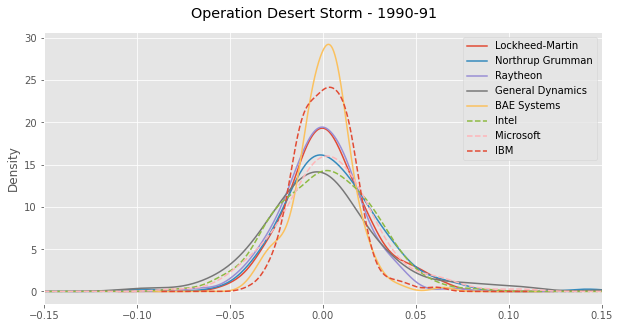

In [293]:
# Plot KDE for Period B

LMT['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='Lockheed-Martin', figsize=(10,5))
NOC['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='Northrup Grumman')
RTX['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='Raytheon')
GD['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='General Dynamics')
BA_L['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='BAE Systems')
INTC['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='Intel', linestyle='--')
MSFT['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='Microsoft', linestyle='--')
IBM['Returns'].loc[iraq_1_start:iraq_1_end].plot(kind='kde', label='IBM', linestyle='--')

plt.legend()
plt.xlim([-0.15, 0.15])
plt.suptitle('Operation Desert Storm - 1990-91', y=0.95, size='x-large');

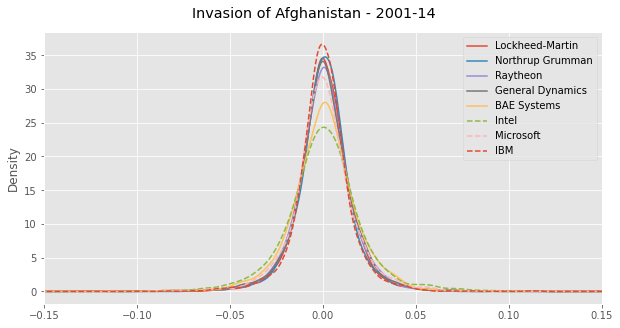

In [292]:
# Plot KDE for Period C

LMT['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='Lockheed-Martin', figsize=(10,5))
NOC['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='Northrup Grumman')
RTX['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='Raytheon')
GD['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='General Dynamics')
BA_L['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='BAE Systems')
INTC['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='Intel', linestyle='--')
MSFT['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='Microsoft', linestyle='--')
IBM['Returns'].loc[afghanistan_start:afghanistan_end].plot(kind='kde', label='IBM', linestyle='--')

plt.legend()
plt.xlim([-0.15, 0.15])
plt.suptitle('Invasion of Afghanistan - 2001-14', y=0.95, size='x-large');


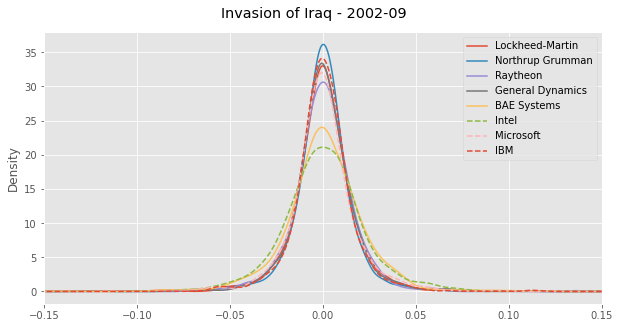

In [291]:
# Plot KDE for Period D

LMT['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='Lockheed-Martin', figsize=(10,5))
NOC['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='Northrup Grumman')
RTX['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='Raytheon')
GD['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='General Dynamics')
BA_L['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='BAE Systems')
INTC['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='Intel', linestyle='--')
MSFT['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='Microsoft', linestyle='--')
IBM['Returns'].loc[iraq_2_start:iraq_2_end].plot(kind='kde', label='IBM', linestyle='--')

plt.legend()
plt.xlim([-0.15, 0.15])
plt.suptitle('Invasion of Iraq - 2002-09', y=0.95, size='x-large');


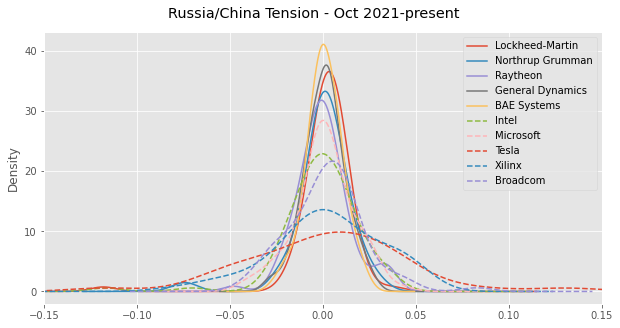

In [290]:
# Plot KDE for Period E

LMT['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Lockheed-Martin', figsize=(10,5))
NOC['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Northrup Grumman')
RTX['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Raytheon')
GD['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='General Dynamics')
BA_L['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='BAE Systems')
INTC['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Intel', linestyle='--')
MSFT['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Microsoft', linestyle='--')
#IBM['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='IBM')
TSLA['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Tesla', linestyle='--')
XLNX['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Xilinx', linestyle='--')
AVGO['Returns'].loc[russia_china_start:russia_china_end].plot(kind='kde', label='Broadcom', linestyle='--')

plt.legend()
plt.xlim([-0.15, 0.15])
plt.suptitle('Russia/China Tension - Oct 2021-present', y=0.95, size='x-large');


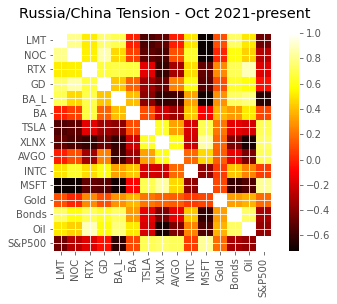

In [295]:
stocktempE = stock_data_E.corr()

plt.imshow(stocktempE, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_E)), stock_corr_E.columns, rotation = 90);
plt.yticks(range(len(stock_corr_E)), stock_corr_E.columns);
plt.suptitle('Russia/China Tension - Oct 2021-present', y=0.97, size='x-large');

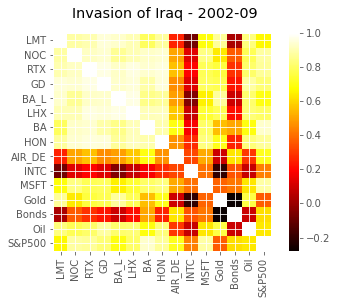

In [296]:
stocktempD = stock_data_D.corr()

plt.imshow(stocktempD, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_D)), stock_corr_D.columns, rotation = 90);
plt.yticks(range(len(stock_corr_D)), stock_corr_D.columns);
plt.suptitle('Invasion of Iraq - 2002-09', y=0.97, size='x-large');

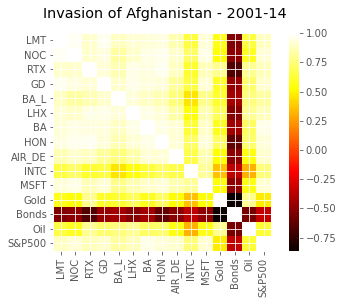

In [297]:
stocktempC = stock_data_C.corr()

plt.imshow(stocktempC, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_C)), stock_corr_C.columns, rotation = 90);
plt.yticks(range(len(stock_corr_C)), stock_corr_C.columns);
plt.suptitle('Invasion of Afghanistan - 2001-14', y=0.97, size='x-large');

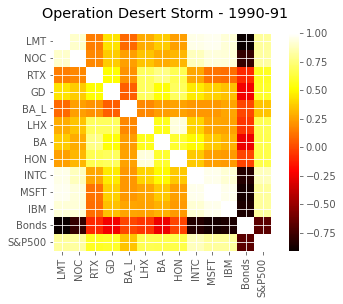

In [298]:
stocktempB = stock_data_B.corr()

plt.imshow(stocktempB, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_B)), stock_corr_B.columns, rotation = 90);
plt.yticks(range(len(stock_corr_B)), stock_corr_B.columns);
plt.suptitle('Operation Desert Storm - 1990-91', y=0.97, size='x-large');

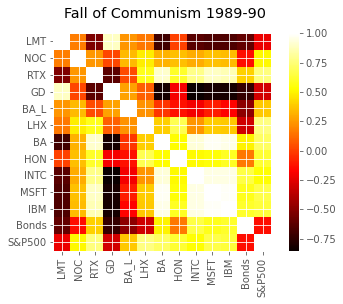

In [299]:
stocktempA = stock_data_A.corr()

plt.imshow(stocktempA, cmap = 'hot', interpolation = 'none');
plt.colorbar()
plt.xticks(range(len(stock_corr_A)), stock_corr_A.columns, rotation = 90);
plt.yticks(range(len(stock_corr_A)), stock_corr_A.columns);
plt.suptitle('Fall of Communism 1989-90', y=0.97, size='x-large');

In [301]:
stock_data_C.tail()

,LMT,NOC,RTX,GD,BA_L,LHX,BA,HON,AIR_DE,INTC,MSFT,Gold,Bonds,Oil,S&P500
Date,,,,,,,,,,,,,,,
2014-12-19,159.570572,133.636398,61.359425,119.210838,337.018768,63.648712,110.403625,83.569450,36.882648,30.086403,41.986713,1195.900024,2.176,56.520000,2070.649902
2014-12-22,162.549332,135.722519,62.182224,120.549339,343.282715,64.382622,112.144119,83.610725,36.781197,30.781279,42.268608,1179.699951,2.162,55.259998,2078.540039
2014-12-23,161.986633,134.902344,62.219379,120.472610,344.739502,64.277748,113.727196,84.246857,36.754730,30.963272,42.682671,1177.900024,2.257,57.119999,2082.169922
2014-12-24,162.532776,135.294571,62.060131,120.668694,345.322205,64.295258,114.785477,84.230331,NaN,30.971546,42.409565,1173.500000,2.264,55.840000,2081.879883
2014-12-26,162.872009,135.107361,62.235302,120.540840,NaN,64.461250,115.126595,83.957718,NaN,31.062536,42.180508,1195.300049,2.250,54.730000,2088.770020
